## Imlementation
                     4
                    /  \
                   2    6
                  / \   / \
                 1   3 5   7

In [27]:
class TreeNode:
    def __init__(self, data):
        self.val = data
        self.left = None
        self.right = None
class BinaryTree:
    def __init__(self,root):
        self.root = root
        
node1 = TreeNode(1)
node2 = TreeNode(2)
node3 = TreeNode(3)
node4 = TreeNode(4)
node5 = TreeNode(5)
node6 = TreeNode(6)
node7 = TreeNode(7)

node4.left, node4.right = node2, node6
node2.left, node2.right = node1, node3
node6.left, node6.right = node5, node7

tree = BinaryTree(node4)
inorder(tree.root)

1 2 3 4 5 6 7 

In [26]:
def inorder(root):
    if not root:
        return
    inorder(root.left)
    print(root.val, end = ' ')
    inorder(root.right)

### Sum of Left Leaves
        3
       / \
      9  20
        /  \
       15   7

There are two left leaves in the binary tree, with values 9 and 15 respectively. Return 24.

In [10]:
# Via dfs
class DFS:
    def sumOfLeftLeaves(self, root: TreeNode) -> int:
        if root is None: return 0
        return self.helper(root, False)
    
    def helper(self, node, isLeft):
        ans = 0
        if node.left is None and node.right is None and isLeft:
            return node.val
        if node.left: 
            ans += self.helper(node.left, True)
        if node.right: 
            ans += self.helper(node.right, False)
        return ans

# Via bfs
class BFS:
    def sumOfLeftLeaves(self, root: TreeNode) -> int:
        if root is None: return 0
        queue = [root]
        ans = 0
        while queue:
            node = queue.pop(0)
            if node.left and node.left.left is None and node.left.right is None:
                ans += node.left.val
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        return ans

# obj = DFS()
# obj.sumOfLeftLeaves(tree.root)

obj = BFS()
obj.sumOfLeftLeaves(tree.root)

6

### Binary Tree pruning
We are given the head node root of a binary tree, where additionally every node's value is either a 0 or a 1.
Return the same tree where every subtree (of the given tree) not containing a 1 has been removed.
(Recall that the subtree of a node X is X, plus every node that is a descendant of X.)
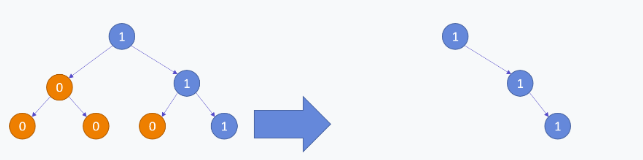

In [7]:
class Solution:
    def pruneTree(self, root: TreeNode):
        ans = self.helper(root)
        if not ans: return None
        return root
    
    def helper(self, root):
        if root is None:
            return False
        left = self.helper(root.left)
        right = self.helper(root.right)
        if not left: root.left = None
        if not right: root.right = None
        if not left and not right and root.val == 0:
            return False
        return True

### Maximum Average Subtree
Given the root of a binary tree, find the maximum average value of any subtree of that tree.

(A subtree of a tree is any node of that tree plus all its descendants. The average value of a tree is the sum of its values, divided by the number of nodes.)

In [8]:
class Solution:
    def maximumAverageSubtree(self, root: TreeNode) -> float:
        if not root: return 0
        self.max = 0
        self.helper(root)
        return self.max
    
    def helper(self, root):
        if root is None:
            return (0,0)
        left = self.helper(root.left)
        right = self.helper(root.right)
        total = left[1] + right[1] + root.val
        size = left[0] + right[0] + 1
        avg = total / size
        self.max = max(self.max, avg)
        return (size, total)
    
obj = Solution()
obj.maximumAverageSubtree(tree.root)

7.0

### Path Sum
Given a binary tree and a sum, determine if the tree has a root-to-leaf path such that adding up all the values along the path equals the given sum.

Note: A leaf is a node with no children.

Example:

Given the below binary tree and sum = 22,

          5
         / \
        4   8
       /   / \
      11  13  4
     /  \      \
    7    2      1
return true, as there exist a root-to-leaf path 5->4->11->2 which sum is 22.

In [62]:
def hasPathSum(root: TreeNode, sum: int) -> bool:
    if root is None:
        return False
    if root.left is None and root.right is None and root.val == sum:
        return True
    for node in [root.left, root.right]:
        if hasPathSum(node, sum-root.val):
            return True
    return False

hasPathSum(tree.root, 15)

True

### Path Sum II
Given a binary tree and a sum, find all root-to-leaf paths where each path's sum equals the given sum.

Note: A leaf is a node with no children.

Example:

Given the below binary tree and sum = 22,

          5
         / \
        4   8
       /   / \
      11  13  4
     /  \    / \
    7    2  5   1
Return:

[
   [5,4,11,2],
   [5,8,4,5]
]

In [15]:
class Solution:
    def pathSum(self, root: TreeNode, sum: int):
        if not root: return []
        self.ans = []
        self.helper(root, [root.val], sum)
        return self.ans
    
    def helper(self, root, buffer, sum):
        if not root.left and not root.right and root.val == sum:
            self.ans.append(buffer[:])
            return
        for node in [root.left, root.right]:
            if node:
                buffer.append(node.val)
                self.helper(node, buffer, sum-root.val)
                buffer.pop()
        
obj = Solution()
obj.pathSum(tree.root, 15)

[[4, 6, 5]]

### Sum of root to leaf numbers
Given a binary tree containing digits from 0-9 only, each root-to-leaf path could represent a number.

An example is the root-to-leaf path 1->2->3 which represents the number 123.

Find the total sum of all root-to-leaf numbers.

Input: [4,9,0,5,1]

                        4
                       / \
                      9   0
                     / \
                    5   1
                    
Output: 1026
Explanation:
The root-to-leaf path 4->9->5 represents the number 495.
The root-to-leaf path 4->9->1 represents the number 491.
The root-to-leaf path 4->0 represents the number 40.
Therefore, sum = 495 + 491 + 40 = 1026.

In [4]:
class Solution:
    def sumNumbers(self, root: TreeNode) -> int:
        if not root: return 0
        self.ans = 0
        self.helper(root, root.val)
        return self.ans
    
    def helper(self, root, currsum):
        if not root.left and not root.right:
            self.ans += currsum
            return
        
        for node in [root.left, root.right]:
            if node:
                self.helper(node, currsum*10 + node.val)

obj = Solution()
obj.sumNumbers(tree.root)

1776

### Path with given sequence
Given a binary tree and a number sequence, find if the sequence is present as a root-to-leaf path in the given tree.
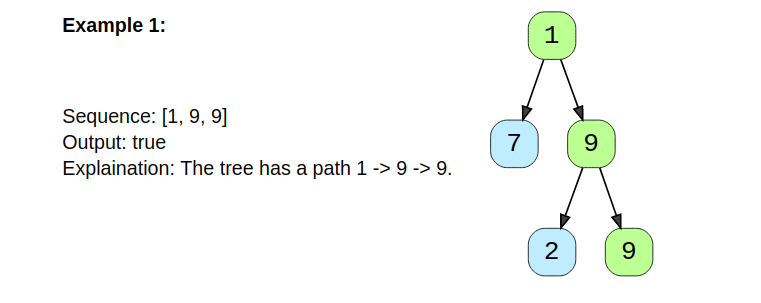

In [11]:
def find_path(root, sequence):
    return helper(root, 0, sequence)

def helper(root, i, arr):
    if not root:
        return False

    if not root.left and not root.right and i == len(arr)-1 and root.val == arr[i]:
        return True

    if i == len(arr):
        return False

    if arr[i] == root.val and helper(root.left, i+1, arr):
        return True

    if arr[i] == root.val and helper(root.right, i+1, arr):
        return True

    return False
    
sequence = [4,6,7]
find_path(tree.root, sequence)

True

### Path sum III
Given a binary tree and a number ‘S’, find all paths in the tree such that the sum of all the node values of each path equals ‘S’. Please note that the paths can start or end at any node but all paths must follow direction from parent to child (top to bottom).
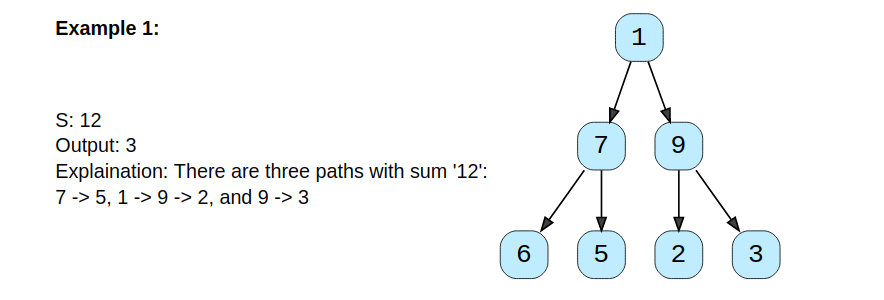

In [67]:
class Solution:
    def pathSum(self, root: TreeNode, sum: int) -> int:
        if not root: return 0
        return self.helper(root, [root.val], sum)

    
    def helper(self, root, buffer, sum):
        pathsum = 0; count = 0
        for i in range(len(buffer)-1,-1,-1):
            pathsum += buffer[i]
            if pathsum == sum:
                count += 1
        
        if root.left is None and root.right is None:
            return count
        
        for node in [root.left, root.right]:
            if node:
                buffer.append(node.val)
                count += self.helper(node, buffer, sum)
                buffer.pop()
        return count
                
obj = Solution()
obj.pathSum(tree.root, 3)

2

In [4]:
from collections import Counter
class Solution:
    def pathSum(self, root: TreeNode, sum: int) -> int:
        self.ans = 0
        self.counter = Counter([0])
        self.helper(root, 0, sum)
        return self.ans
    
    def helper(self, root, currsum, target):
        if not root:
            return
        currsum += root.val
        self.ans += self.counter[currsum-target]
        self.counter[currsum] += 1
        self.helper(root.left, currsum, target)
        self.helper(root.right, currsum, target)
        self.counter[currsum] -= 1
    
obj = Solution()
obj.pathSum(tree.root, 3)

2

### Given a non-empty binary tree, find the maximum path sum.

For this problem, a path is defined as any sequence of nodes from some starting node to any node in the tree along the parent-child connections. The path must contain at least one node and does not need to go through the root.
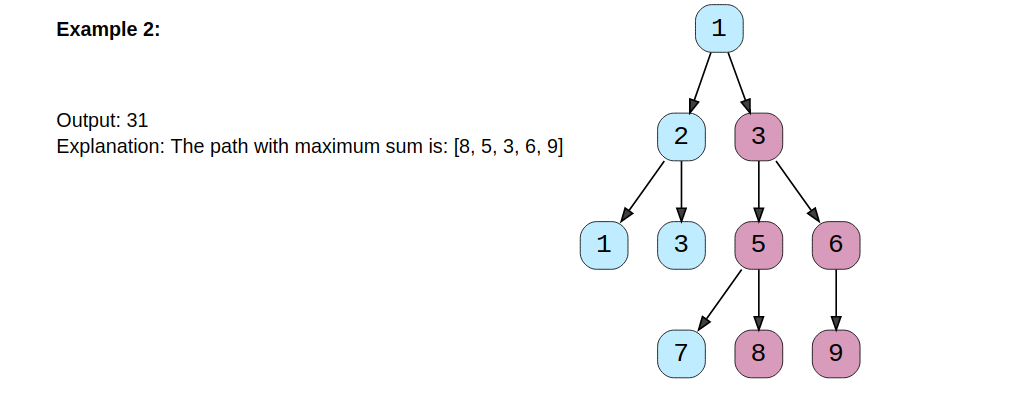

In [68]:
class Solution:
    def maxPathSum(self, root: TreeNode) -> int:
        self.maxsum=-float('inf')
        self.helper(root)
        return self.maxsum
    
    def helper(self, root):
        if not root:
            return 0
        leftsum = max(self.helper(root.left),0)
        rightsum = max(self.helper(root.right),0)
        value = root.val + leftsum + rightsum
        self.maxsum = max(self.maxsum, value)
        return root.val + max(leftsum, rightsum)
    
obj = Solution()
obj.maxPathSum(tree.root)

22

### Longest Univalue Path
Given a binary tree, find the length of the longest path where each node in the path has the same value. This path may or may not pass through the root.

The length of path between two nodes is represented by the number of edges between them.

 

Example 1:

Input:

              5
             / \
            4   5
           / \   \
          1   1   5

In [16]:
class Solution:
    def longestUnivaluePath(self, root: TreeNode) -> int:
        self.ans = 0
        self.helper(root)
        return self.ans
    
    def helper(self, root):
        if root is None:
            return (0, None)
        l_len, l_val = self.helper(root.left)
        r_len, r_val = self.helper(root.right)
        if l_val != root.val:
            l_len = 0
        if r_val != root.val:
            r_len = 0
        self.ans = max(self.ans, l_len + r_len)
        return 1+max(l_len, r_len), root.val

### Count Univalue Subtrees
Given a binary tree, count the number of uni-value subtrees.

A Uni-value subtree means all nodes of the subtree have the same value.

In [18]:
class Solution:
    def countUnivalSubtrees(self, root) -> int:
        self.ans = 0
        self.helper(root)
        return self.ans
    
    def helper(self, root):
        if root is None:
            return True, None
        
        left_uni, left_val = self.helper(root.left)
        right_uni, right_val = self.helper(root.right)
        
        left_part = left_uni and (left_val is None or left_val == root.val)
        right_part = right_uni and (right_val is None or right_val == root.val)
        
        is_uni = left_part and right_part
        self.ans += is_uni
        return (is_uni, root.val)

### Binary Tree Longest Consecutive Path
Given a binary tree, find the length of the longest consecutive sequence path.

The path refers to any sequence of nodes from some starting node to any node in the tree along the parent-child connections. The longest consecutive path need to be from parent to child (cannot be the reverse).

Example 1:

Input:

           1
            \
             3
            / \
           2   4
                \
                 5

Output: 3

Explanation: Longest consecutive sequence path is 3-4-5, so return 3.

In [25]:
class Solution:
    def longestConsecutive(self, root: TreeNode) -> int:
        self.ans = 0
        self.helper(root)
        return self.ans
    
    def helper(self, root):
        if not root:
            return 0
        left_size = self.helper(root.left)
        right_size = self.helper(root.right)
        if root.left and root.left.val != root.val+1:
            left_size = 0
        if root.right and root.right.val != root.val + 1:
            right_size = 0
        self.ans = max(self.ans, max(left_size, right_size)+1)
        return max(left_size, right_size)+1
    
obj = Solution()
obj.longestConsecutive(tree.root)

2

### Binary Tree Longest Consecutive Sequence II
Given a binary tree, you need to find the length of Longest Consecutive Path in Binary Tree.

Especially, this path can be either increasing or decreasing. For example, [1,2,3,4] and [4,3,2,1] are both considered valid, but the path [1,2,4,3] is not valid. On the other hand, the path can be in the child-Parent-child order, where not necessarily be parent-child order.

In [23]:
class Solution:
    def longestConsecutiveII(self, root: TreeNode) -> int:
        self.ans = 0
        self.helper(root)
        return self.ans
    
    def helper(self, root):
        if not root:
            return 0, 0
        
        li, ld = self.helper(root.left)
        ri, rd = self.helper(root.right)
        
        if root.left:
            li = 0 if root.left.val != root.val + 1 else li
            ld = 0 if root.left.val != root.val - 1 else ld
        if root.right:
            ri = 0 if root.right.val != root.val + 1 else ri
            rd = 0 if root.right.val != root.val - 1 else rd
            
        longest_inc = max(li, ri) + 1
        longest_dec = max(ld, rd) + 1
        self.ans = max(self.ans, longest_inc + longest_dec - 1)
        return longest_inc, longest_dec

obj = Solution()
obj.longestConsecutiveII(tree.root)

3

### Find Duplicate Subtrees.
Given a binary tree, return all duplicate subtrees. For each kind of duplicate subtrees, you only need to return the root node of any one of them.

Two trees are duplicate if they have the same structure with same node values.

In [7]:
class Solution:
    def findDuplicateSubtrees(self, root: TreeNode):
        self.counter = collections.Counter(); self.ans = []
        self.serialize(root)
        return self.ans
    
    def serialize(self, root):
        if root is None:
            return '#'
        left = self.serialize(root.left)
        right = self.serialize(root.right)
        string = str(root.val) + ' ' + left + ' ' + right
        self.counter[string] += 1
        if self.counter[string] == 2:
            self.ans.append(root)
        return string

### Serialize and Deserialize Binary Tree


In [11]:
class Codec:

    def serialize(self, root):
        string = []
        self.serialize_helper(root, string)
        return ' '.join(string)
    
    def serialize_helper(self, root ,string):
        if root is None:
            string.append('null')
            return
        string.append(str(root.val))
        self.serialize_helper(root.left, string)
        self.serialize_helper(root.right, string)
        

    def deserialize(self, data):
        arr = data.split(' ')
        return self.deserialize_helper(arr)
    
    def deserialize_helper(self, arr):
        val = arr.pop(0)
        if val == 'null':
            return
        root = TreeNode(int(val))
        root.left = self.deserialize_helper(arr)
        root.right = self.deserialize_helper(arr)
        return root

codec = Codec()
serialized_string = codec.serialize(tree.root)
print(serialized_string)
codec.deserialize(serialized_string)

4 2 1 null null 3 null null 6 5 null null 7 null null


### Serialize and Deserialize N-ary Tree


In [15]:
class Codec:

    def serialize(self, root):
        string = []
        self.serialize_helper(root, string)
        return ' '.join(string)
    
    def serialize_helper(self, root, string):
        if root is None:
            string.append('null')
            return
        string.append(str(root.val))
        string.append(str(len(root.children)))
        for child in root.children:
            self.serialize_helper(child, string)

    def deserialize(self, data):
        arr = data.split(' ')
        return self.deserialize_helper(arr)
    
    def deserialize_helper(self, arr):
        val = arr.pop(0)
        if val == 'null': return
        node = Node(int(val), [])
        for i in range(int(arr.pop(0))):
            node.children.append(self.deserialize_helper(arr))
        return node

### Construct Binary Search Tree from Preorder Traversal
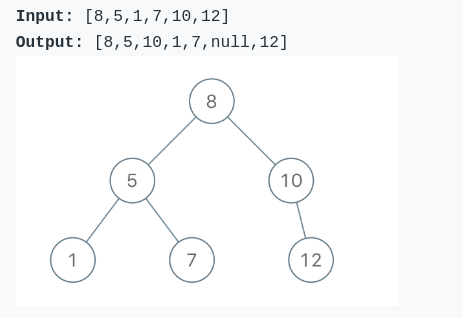

In [17]:
class Solution:
    def bstFromPreorder(self, preorder) -> TreeNode:
        return self.helper(preorder, float('inf'))
    
    def helper(self, preorder, max_val):
        if not preorder or preorder[0]>max_val:
            return
        root = TreeNode(preorder.pop(0))
        root.left = self.helper(preorder, root.val)
        root.right = self.helper(preorder, max_val)
        return root

obj = Solution()
obj.bstFromPreorder([8,5,1,7,10,12])

### Serialize and Deserialize Binary Search Tree

In [18]:
class Codec:

    def serialize(self, root):
        string = []
        self.serialize_helper(root, string)
        return ' '.join(string)
    
    def serialize_helper(self, root, string):
        if not root: return
        string.append(str(root.val))
        self.serialize_helper(root.left, string)
        self.serialize_helper(root.right, string)
        
    def deserialize(self, data):
        if not data: return
        preorder = data.split(' ')
        return self.deserialize_helper(preorder, float('inf'))
    
    def deserialize_helper(self, preorder, max_val):
        if not preorder or int(preorder[0])>max_val:
            return
        root = TreeNode(int(preorder.pop(0)))
        root.left = self.deserialize_helper(preorder, root.val)
        root.right = self.deserialize_helper(preorder, max_val)
        return root

codec = Codec()
serialized_string = codec.serialize(tree.root)
print(serialized_string)
codec.deserialize(serialized_string)

4 2 1 3 6 5 7


### Encode N-ary Tree to Binary Tree

In [5]:
class Node:
    def __init__(self, val=None, children=None):
        self.val = val
        self.children = children
        
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Codec:
    def encode(self, root: 'Node') -> TreeNode:
        if not root:
            return 
        
        new_root = TreeNode(root.val)
        if len(root.children) > 0:
            new_root.left = self.encode(root.children[0])
            
        node = new_root.left
        for i in range(1, len(root.children)):
            node.right = self.encode(root.children[i])
            node = node.right
            
        return new_root
        
    def decode(self, root: TreeNode) -> 'Node':
        if not root:
            return
        new_root = Node(root.val, [])
        node = root.left
        while node:
            new_root.children.append(self.decode(node))
            node = node.right
        return new_root

### Delete Nodes and return forest
Given the root of a binary tree, each node in the tree has a distinct value.

After deleting all nodes with a value in to_delete, we are left with a forest (a disjoint union of trees).

Return the roots of the trees in the remaining forest.  You may return the result in any order.
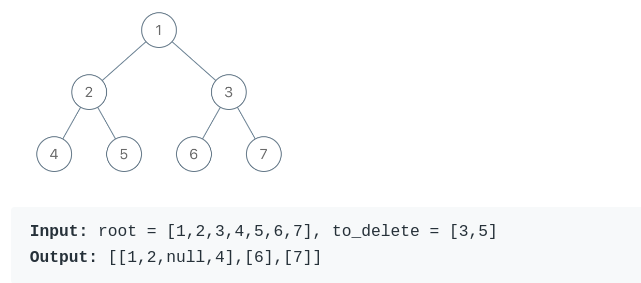

In [4]:
# via DFS
class Solution:
    def delNodes(self, root: TreeNode, to_delete):
        self.res = []
        to_delete = set(to_delete)
        self.helper(root, True, to_delete)
        return self.res
    
    def helper(self, root, is_root, to_delete):
        if not root:
            return
        if is_root and root.val not in to_delete:
            self.res.append(root)
        child_is_root = root.val in to_delete
        root.left = self.helper(root.left, child_is_root, to_delete)
        root.right = self.helper(root.right, child_is_root, to_delete)
        return root if root.val not in to_delete else None

In [5]:
# via BFS
class Solution:
    def delNodes(self, root: TreeNode, to_delete):
        queue = [(root, False)]
        to_delete = set(to_delete)
        res = []
        
        while queue:
            node, has_parent = queue.pop(0)
            if not has_parent and node.val not in to_delete:
                res.append(node)
            
            has_parent = not node.val in to_delete
            if node.left:
                queue.append((node.left, has_parent))
                if node.left.val in to_delete:
                    node.left = None
            if node.right:
                queue.append((node.right, has_parent))
                if node.right.val in to_delete:
                    node.right = None
        
        return res

### Delete Leaves With a Given Value
Given a binary tree root and an integer target, delete all the leaf nodes with value target.

Note that once you delete a leaf node with value target, if it's parent node becomes a leaf node and has the value target, it should also be deleted (you need to continue doing that until you can't).

In [3]:
class Solution:
    def removeLeafNodes(self, root: TreeNode, target: int) -> TreeNode:
        return self.helper(root, target)
    
    def helper(self, root, target):
        if not root:
            return
        root.left = self.helper(root.left, target)
        root.right = self.helper(root.right, target)
        return None if root.left is None and root.right is None and root.val == target else root

obj = Solution()
obj.removeLeafNodes(tree.root, 1)

### Find Leaves of Binary Tree
Given a binary tree, collect a tree's nodes as if you were doing this: Collect and remove all leaves, repeat until the tree is empty.

                  1
                 / \
                2   3
               / \     
              4   5    

Output: [[4,5,3],[2],[1]]


In [4]:
class Solution:
    def findLeaves(self, root: TreeNode):
        self.res = []
        self.min = float('inf'); self.max = -float('inf')
        self.helper(root)
        return self.res
        
    def helper(self, root):
        if root is None:
            return -1
        left = self.helper(root.left)
        right = self.helper(root.right)
        height = 1 + max(left, right)
        if height >= len(self.res):
            self.res.append([])
        self.res[height].append(root.val)
        return height

obj = Solution()
obj.findLeaves(tree.root)

[[1, 3, 5, 7], [2, 6], [4]]

###  Binary Tree Cameras
Given a binary tree, we install cameras on the nodes of the tree. 

Each camera at a node can monitor its parent, itself, and its immediate children.

Calculate the minimum number of cameras needed to monitor all nodes of the tree.

In [8]:
class Solution:
    def minCameraCover(self, root: TreeNode) -> int:
        self.need_cam = 0
        self.monitored = 1
        self.has_cam = 2
        self.camera = 0
        
        top_state = self.helper(root)
        if top_state == self.need_cam:
            return self.camera + 1
        return self.camera
    
    def helper(self, root):
        if root is None:
            return self.monitored
        
        left = self.helper(root.left)
        right = self.helper(root.right)
        if left == self.monitored and right == self.monitored:
            return self.need_cam
        if left == self.need_cam or right == self.need_cam:
            self.camera += 1
            return self.has_cam
        return self.monitored

obj = Solution()
obj.minCameraCover(tree.root)

2

### Distribute Coins in Binary Tree
Given the root of a binary tree with N nodes, each node in the tree has node.val coins, and there are N coins total.

In one move, we may choose two adjacent nodes and move one coin from one node to another.  (The move may be from parent to child, or from child to parent.)

Return the number of moves required to make every node have exactly one coin.

In [12]:
class Solution:
    def distributeCoins(self, root: TreeNode) -> int:
        self.ans = 0
        self.helper(root)
        return self.ans
    
    def helper(self, root):
        if not root:
            return 0
        left = self.helper(root.left)
        right = self.helper(root.right)
        coins_to_move = root.val + left + right - 1
        self.ans += abs(coins_to_move)
        return coins_to_move

### Binary Tree Coloring Game
Two players play a turn based game on a binary tree.  We are given the root of this binary tree, and the number of nodes n in the tree.  n is odd, and each node has a distinct value from 1 to n.

Initially, the first player names a value x with 1 <= x <= n, and the second player names a value y with 1 <= y <= n and y != x.  The first player colors the node with value x red, and the second player colors the node with value y blue.

Then, the players take turns starting with the first player.  In each turn, that player chooses a node of their color (red if player 1, blue if player 2) and colors an uncolored neighbor of the chosen node (either the left child, right child, or parent of the chosen node.)

If (and only if) a player cannot choose such a node in this way, they must pass their turn.  If both players pass their turn, the game ends, and the winner is the player that colored more nodes.

You are the second player.  If it is possible to choose such a y to ensure you win the game, return true.  If it is not possible, return false.

In [12]:
class Solution:
    def btreeGameWinningMove(self, root: TreeNode, n: int, x: int) -> bool:
        q = [root]
        while q:
            node = q.pop(0)
            if node.val == x:
                left = self.get_size(node.left)
                right = self.get_size(node.right)
                break
            if node.left: q.append(node.left)
            if node.right: q.append(node.right)
        
        if left + right + 1 < n/2:
            return True
        if left > n/2 or right > n/2:
            return True
        return False
    
    def get_size(self, root):
        if not root:
            return 0
        size = 1
        size += self.get_size(root.left)
        size += self.get_size(root.right)
        return size

### Flip Equivalent Binary Trees
For a binary tree T, we can define a flip operation as follows: choose any node, and swap the left and right child subtrees.

A binary tree X is flip equivalent to a binary tree Y if and only if we can make X equal to Y after some number of flip operations.

Write a function that determines whether two binary trees are flip equivalent.  The trees are given by root nodes root1 and root2.

In [5]:
class Solution:
    def flipEquiv(self, root1, root2) -> bool:
        if root1 is None or root2 is None:
            return root1 == root2
        
        if root1.val == root2.val:
            if self.flipEquiv(root1.left, root2.left) and self.flipEquiv(root1.right, root2.right):
                return True
            if self.flipEquiv(root1.right, root2.left) and self.flipEquiv(root1.left, root2.right):
                return True
        return False

### Maximum Difference Between Node and Ancestor
Given the root of a binary tree, find the maximum value V for which there exists different nodes A and B where V = |A.val - B.val| and A is an ancestor of B.

(A node A is an ancestor of B if either: any child of A is equal to B, or any child of A is an ancestor of B.)

In [8]:
class Solution:
    def maxAncestorDiff(self, root: TreeNode) -> int:
        self.ans = -float('inf')
        self.helper(root)
        return self.ans
    
    def helper(self, root):
        if root is None:
            return []
        left = self.helper(root.left)
        right = self.helper(root.right)
        desc = left + right
        if len(desc) == 0:
            return [root.val, root.val]
        max_val = max([root.val] + desc)
        min_val = min([root.val] + desc)
        for val in desc:
            self.ans = max(self.ans, abs(root.val-val))
        return [min_val, max_val]

Solution().maxAncestorDiff(tree.root)

3

### Smallest String Starting From Leaf 
Given the root of a binary tree, each node has a value from 0 to 25 representing the letters 'a' to 'z': a value of 0 represents 'a', a value of 1 represents 'b', and so on.

Find the lexicographically smallest string that starts at a leaf of this tree and ends at the root.

(As a reminder, any shorter prefix of a string is lexicographically smaller: for example, "ab" is lexicographically smaller than "aba".  A leaf of a node is a node that has no children.)

In [6]:
class Solution:
    def smallestFromLeaf(self, root: TreeNode) -> str:
        self.ans = chr(127)
        self.helper(root, [chr(97+root.val)])
        return self.ans
    
    def helper(self, root, path):
        if not root.left and not root.right:
            string = ''.join(path)
            self.ans = min(self.ans, string[::-1])
            return
        if root.left:
            self.helper(root.left, path+[chr(97+root.left.val)])
        if root.right:
            self.helper(root.right, path+[chr(97+root.right.val)])
    
Solution().smallestFromLeaf(tree.root)

'bce'

### Flip Binary Tree To Match Preorder Traversal 
Given a binary tree with N nodes, each node has a different value from {1, ..., N}.

A node in this binary tree can be flipped by swapping the left child and the right child of that node.

Consider the sequence of N values reported by a preorder traversal starting from the root.  Call such a sequence of N values the voyage of the tree.

(Recall that a preorder traversal of a node means we report the current node's value, then preorder-traverse the left child, then preorder-traverse the right child.)

Our goal is to flip the least number of nodes in the tree so that the voyage of the tree matches the voyage we are given.

If we can do so, then return a list of the values of all nodes flipped.  You may return the answer in any order.

If we cannot do so, then return the list [-1].

In [7]:
class Solution:
    def flipMatchVoyage(self, root: TreeNode, voyage):
        self.i = 0
        self.res = []
        val = self.dfs(root, voyage)
        return self.res if val  else [-1]
    
    def dfs(self, root, voyage):
        if not root:
            return True
        if root.val != voyage[self.i]:
            return False
        self.i += 1
        if root.left and root.left.val != voyage[self.i]:
            self.res.append(root.val)
            root.left, root.right = root.right, root.left
        return self.dfs(root.left, voyage) and self.dfs(root.right, voyage)        

### Insufficient Nodes in Root to Leaf Paths
Given the root of a binary tree, consider all root to leaf paths: paths from the root to any leaf.  (A leaf is a node with no children.)

A node is insufficient if every such root to leaf path intersecting this node has sum strictly less than limit.

Delete all insufficient nodes simultaneously, and return the root of the resulting binary tree.

In [30]:
class Solution:
    def sufficientSubset(self, root: TreeNode, limit: int) -> TreeNode:
        return self.helper(root, 0, limit)[1]
    
    def helper(self, root, p_sum, limit):
        if not root:
            return -float('inf'), None
        
        left_sum, root.left = self.helper(root.left, p_sum+root.val, limit)
        right_sum, root.right = self.helper(root.right, p_sum+root.val, limit)
        
        if left_sum == right_sum == -float('inf'):
            root_sum = root.val
        else:
            root_sum = max(left_sum, right_sum) + root.val
        
        if root_sum + p_sum < limit:
            root = None
        return root_sum, root

Solution().sufficientSubset(tree.root, 10)
inorder(tree.root)

4 5 6 7 